In [77]:
import numpy as np
import pandas as pd
import pandoc
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [144]:
df = pd.read_csv('data_33.csv')

In [213]:
df['pressure_binary'] = df['pressure'].apply(lambda x: 1 if x > 940 else 0)

In [214]:
df.head()

,water_level,precipitation,temperature,humidity,visibility,wind,weather,pressure,fire,wl_change,temp_change,pressure_change,pressure_binary
0,468.0,0.0,24.9,31.0,100.0,4.0,0.0,993.8,4.0,-3.0,-0.3,-0.4,1
1,140.0,0.0,27.9,22.0,20.0,1.0,0.0,1004.1,4.0,-2.0,0.6,-1.0,1
2,464.0,0.0,25.6,28.0,20.0,2.0,1.0,1001.2,4.0,-7.0,-1.8,-0.3,1
3,467.0,0.0,26.7,26.0,100.0,3.0,0.0,992.3,4.0,-1.0,1.2,-1.3,1
4,138.0,0.0,29.1,22.0,20.0,1.0,0.0,1001.3,4.0,-2.0,2.5,-1.3,1


In [216]:
df.describe()

,water_level,precipitation,temperature,humidity,visibility,wind,weather,pressure,fire,wl_change,temp_change,pressure_change,pressure_binary
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,301.599722,0.225156,14.036484,62.458652,34.870049,2.615705,1.547603,993.461501,4.048645,-2.395413,1.364628,-0.102502,0.955525
std,219.856590,1.279084,7.490794,22.916418,35.923140,1.691113,1.745746,21.782202,0.215199,11.057569,4.062457,1.201005,0.206220
min,-186.000000,0.000000,-11.300000,9.000000,0.000000,1.000000,0.000000,895.400000,4.000000,-81.000000,-10.600000,-4.000000,0.000000
25%,121.000000,0.000000,8.800000,45.000000,10.000000,1.000000,0.000000,989.500000,4.000000,-5.000000,-1.200000,-0.800000,1.000000
50%,240.000000,0.000000,14.700000,64.000000,20.000000,2.000000,1.000000,997.000000,4.000000,-2.000000,1.100000,-0.200000,1.000000
75%,469.000000,0.000000,19.500000,82.000000,20.000000,3.000000,2.000000,1005.000000,4.000000,0.000000,3.800000,0.600000,1.000000
max,1063.000000,25.000000,32.900000,100.000000,100.000000,11.000000,8.000000,1029.400000,5.000000,125.000000,16.300000,6.200000,1.000000


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   water_level      1439 non-null   float64
 1   precipitation    1439 non-null   float64
 2   temperature      1439 non-null   float64
 3   humidity         1439 non-null   float64
 4   visibility       1439 non-null   float64
 5   wind             1439 non-null   float64
 6   weather          1439 non-null   float64
 7   pressure         1439 non-null   float64
 8   fire             1439 non-null   float64
 9   wl_change        1439 non-null   float64
 10  temp_change      1439 non-null   float64
 11  pressure_change  1439 non-null   float64
 12  pressure_binary  1439 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 146.3 KB


A/2) Null értékek sehol nincsenek, sem extrém értékek, minden normális

In [218]:
def detailed_analysis(df):
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    distincts = df.apply(lambda x: x.unique().shape[0])
    nulls = df.apply(lambda x: x.isnull().sum())
    missing_ratio = (df.isnull().sum() / obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt()
    print('Data shape:', df.shape)
    
    
    cols = ['types', 'counts', 'distincts', 'nulls', 'missing ratio', 'skewness', 'kurtosis']
    details = pd.concat([types, counts, distincts, nulls, missing_ratio, skewness, kurtosis], axis = 1)
    
    details.columns = cols
    dtypes = details.types.value_counts()
    print('___________________________\nData types:\n', dtypes)
    print('___________________________')
    
    return details


details = detailed_analysis(df)
details


Data shape: (1439, 13)
___________________________
Data types:
 types
float64    12
int64       1
Name: count, dtype: int64
___________________________


,types,counts,distincts,nulls,missing ratio,skewness,kurtosis
water_level,float64,1439,589,0,0.0,0.758862,0.129023
precipitation,float64,1439,22,0,0.0,12.356042,183.411992
temperature,float64,1439,330,0,0.0,-0.255568,-0.251170
humidity,float64,1439,91,0,0.0,-0.220857,-1.010279
visibility,float64,1439,7,0,0.0,1.210978,-0.405737
wind,float64,1439,11,0,0.0,1.428635,2.472240
weather,float64,1439,9,0,0.0,1.492147,2.015815
pressure,float64,1439,535,0,0.0,-2.544575,7.898359
fire,float64,1439,2,0,0.0,4.200601,15.666825
wl_change,float64,1439,87,0,0.0,1.606519,29.985110


A/1) 12 attribóutum:

water_level: level of water in cm (vízszint) - folytonos
precipitation: precipitation in mm (csapadék mennyiség) - folytonos
temperature: temperature in Celsius (hőmérséklet) - folytonos
humidity: humidity in % (páratartalom) - folytonos
visibility: visibility in km (látótávolság) - diszkrét (0, 1, 2, 4, 10, 20, 100)
wind: speed of wind in m/s (szélsebesség) - diszkrét (1 - 11)
weather: general weather condition (általános ídőjárás) - diszkrét (0 - 8)
0 - Partly Cloudy
1 - Cloudy
2 - Clear
3 - Rain
4 - Strong Wind
5 - Fog
6 - Mist
7 - Snow
8 - Storm
pressure: pressure in GPa (nyomás) - folytonos
fire: level of fire hazard (tűzveszély szintje) - diszkrét (4, 5)
wl_change: change of water level in cm (vízszintválzotás) - folytonos
temp_change: change of temperature in Celsius (hőmérsékletváltozás) - folytonos
pressure_change: change of pressure in GPa (nyomásváltozás) - folytonos

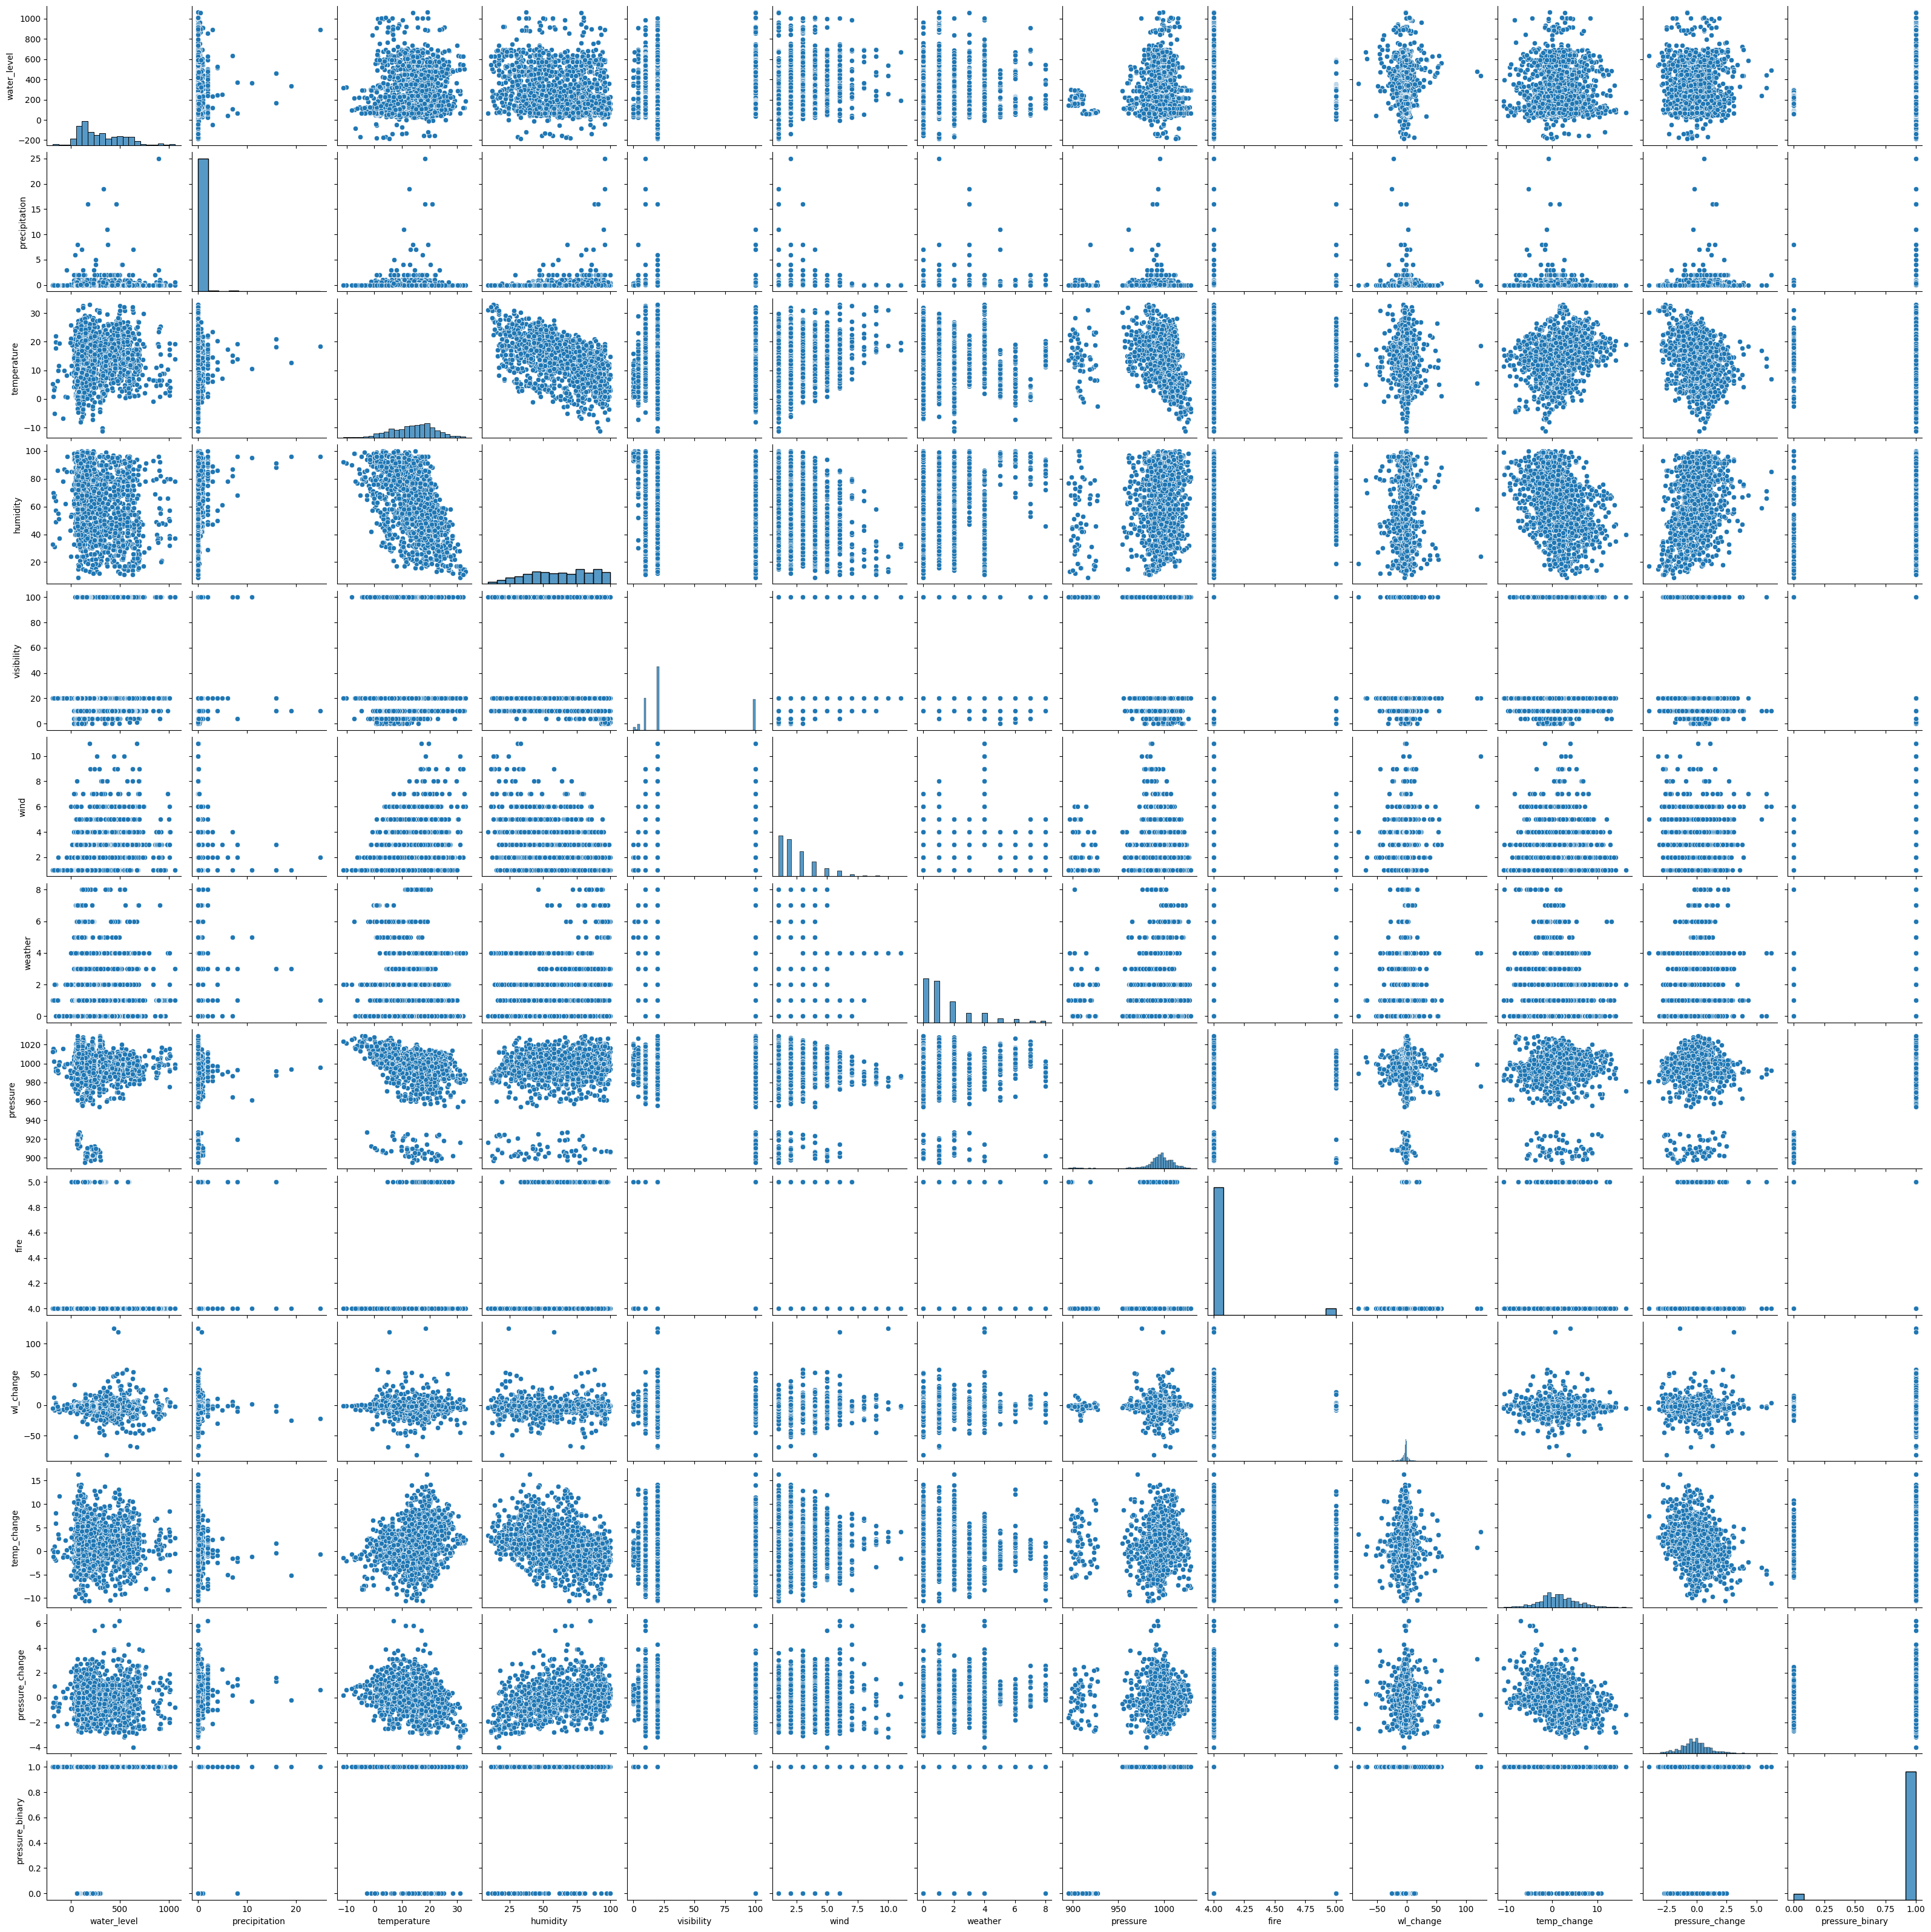

In [134]:
sns.pairplot(df)

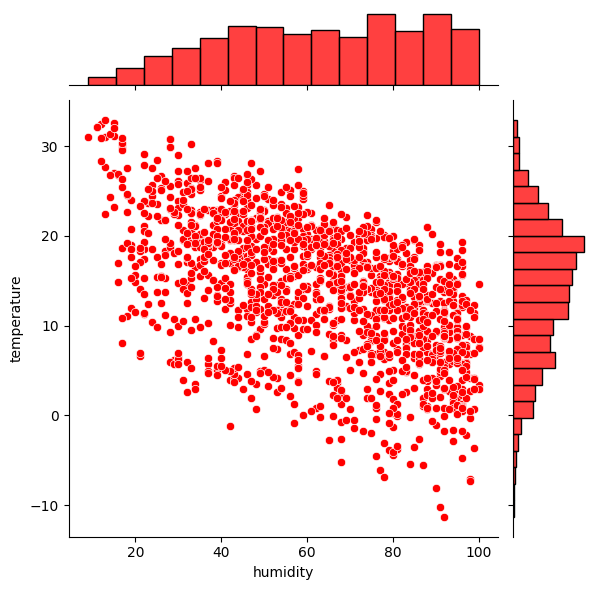

In [219]:
sns.jointplot(data=df,x='humidity',y='temperature', color='r')

<Axes: >

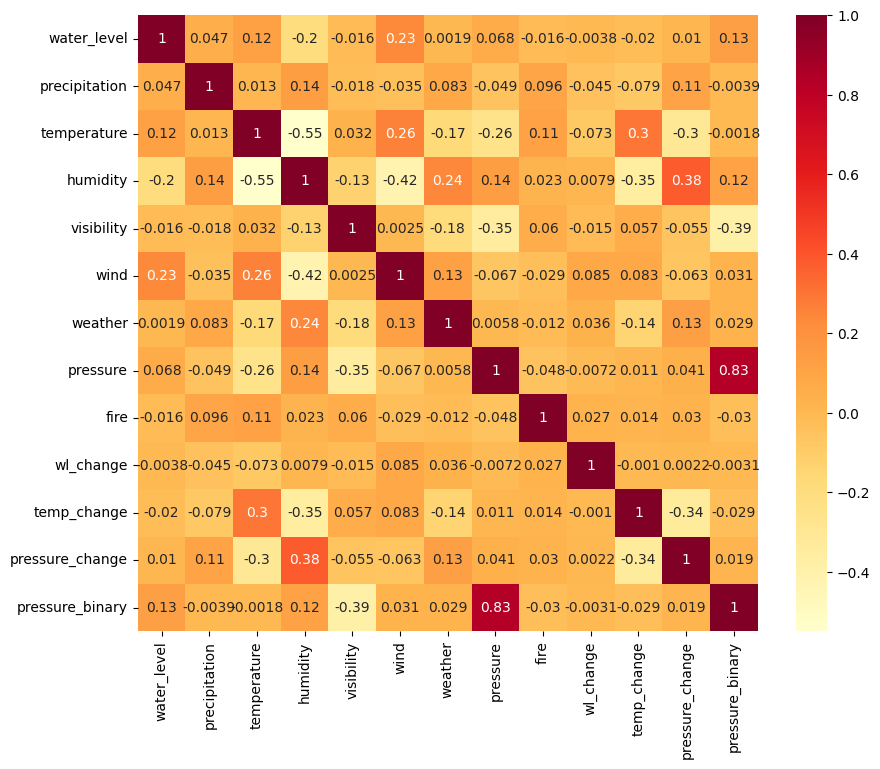

In [220]:
correlations = df.corr()

fig = plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='YlOrRd')

array([[<Axes: title={'center': 'water_level'}>,
        <Axes: title={'center': 'temperature'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'wind'}>]], dtype=object)

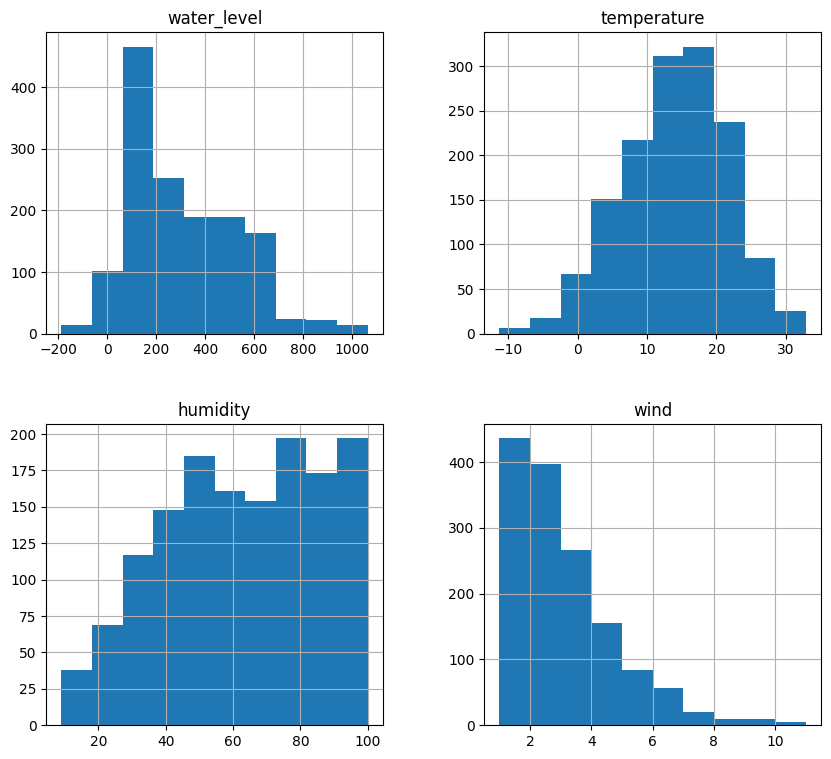

In [221]:
features = ['water_level', 'temperature','humidity','wind']
df[features].hist(figsize=(10,9))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

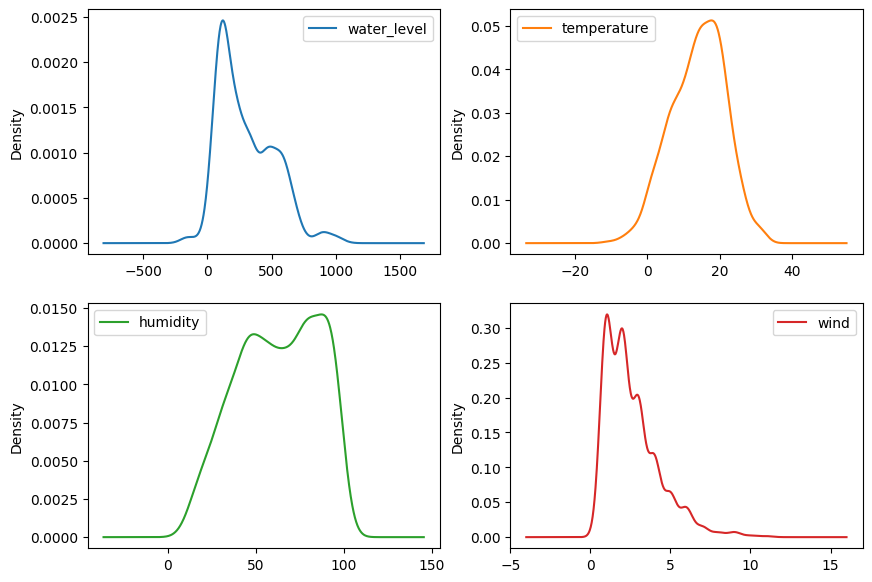

In [35]:
df[features].plot.density(subplots=True, sharex=False, layout=(2,2),figsize=(10,7))

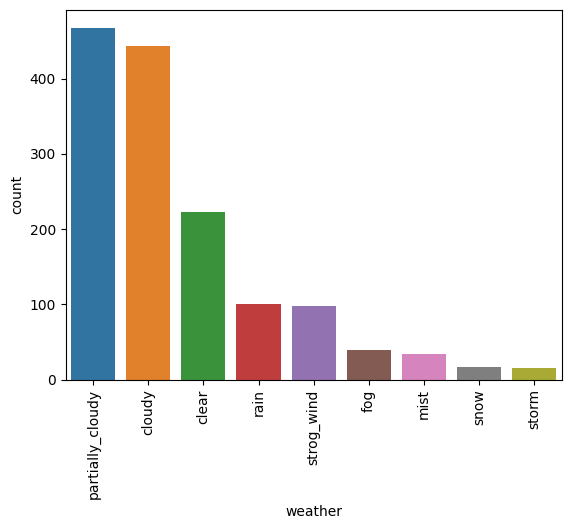

In [45]:
weatherlabels=['partially_cloudy','cloudy','clear','rain','strog_wind','fog','mist','snow','storm']
cnt = sns.countplot(data=df,x='weather')
cnt.set_xticklabels(labels=weatherlabels)
cnt.tick_params(axis='x', rotation=90)

[Text(0, 0, 'partially_cloudy'),
 Text(1, 0, 'cloudy'),
 Text(2, 0, 'clear'),
 Text(3, 0, 'rain'),
 Text(4, 0, 'strog_wind'),
 Text(5, 0, 'fog'),
 Text(6, 0, 'mist'),
 Text(7, 0, 'snow'),
 Text(8, 0, 'storm')]

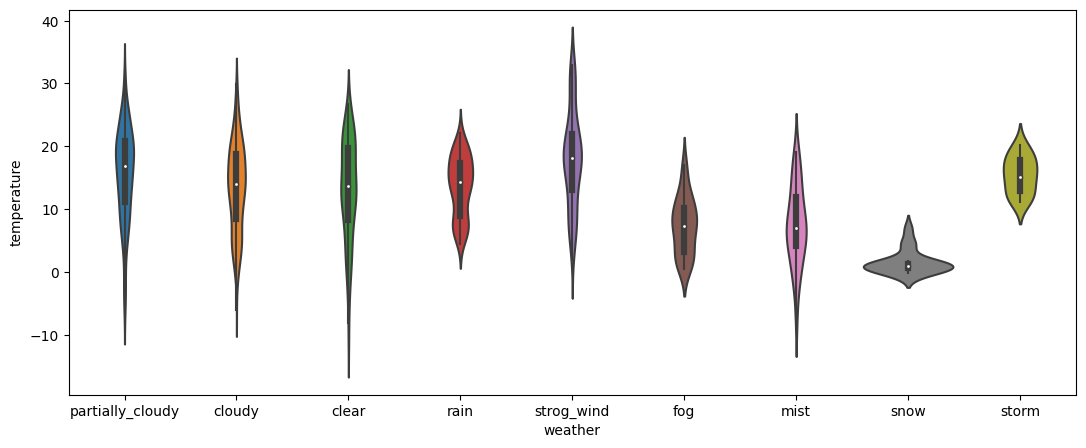

In [223]:
weatherlabels=['partially_cloudy','cloudy','clear','rain','strog_wind','fog','mist','snow','storm']
plt.figure(figsize=(13,5))
viol = sns.violinplot(data=df,x='weather',y='temperature')
viol.set_xticklabels(labels=weatherlabels)

[Text(0, 0, 'partially_cloudy'),
 Text(1, 0, 'cloudy'),
 Text(2, 0, 'clear'),
 Text(3, 0, 'rain'),
 Text(4, 0, 'strog_wind'),
 Text(5, 0, 'fog'),
 Text(6, 0, 'mist'),
 Text(7, 0, 'snow'),
 Text(8, 0, 'storm')]

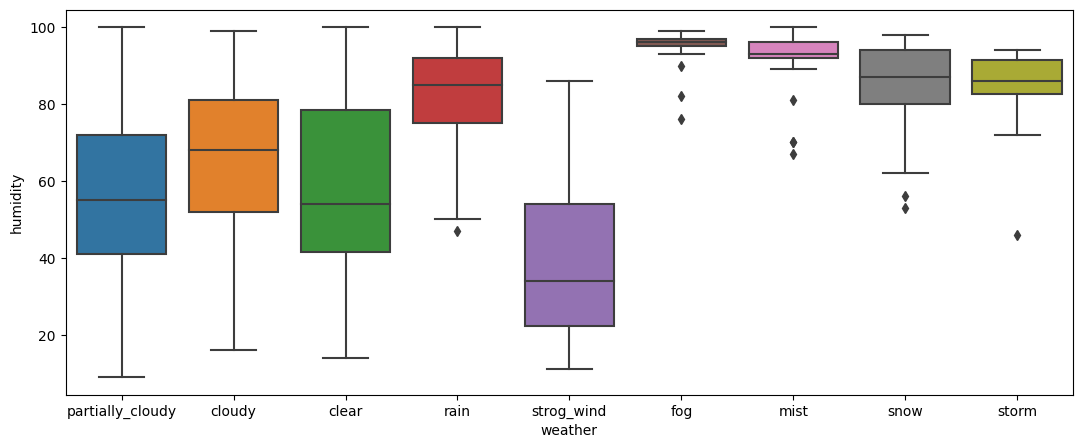

In [224]:
fig, ax = plt.subplots(figsize=(13,5))
boxpl = sns.boxplot(data=df,x='weather', y='humidity',ax=ax)
boxpl.set_xticklabels(labels=weatherlabels)

<Axes: xlabel='wind', ylabel='count'>

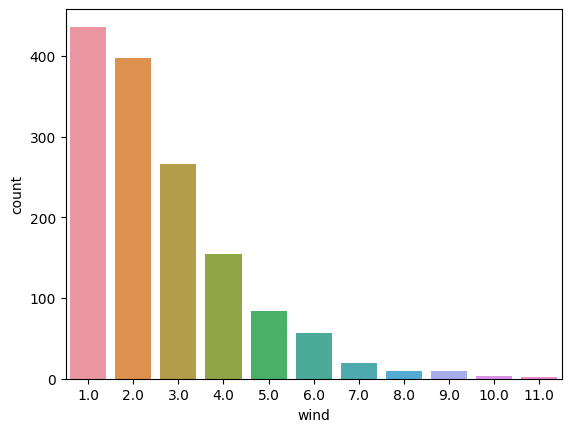

In [225]:
sns.countplot(data=df, x='wind')

<Axes: >

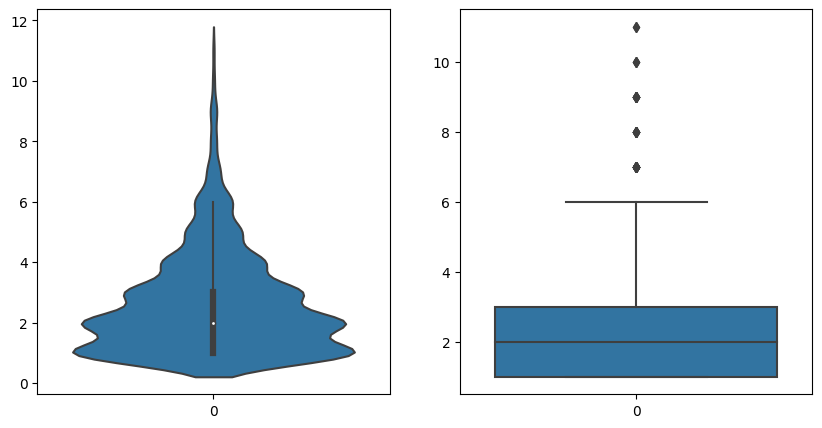

In [226]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.violinplot(data=df['wind'],ax=ax[0])
sns.boxplot(data=df['wind'],ax=ax[1])

C:\Users\Laptop\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


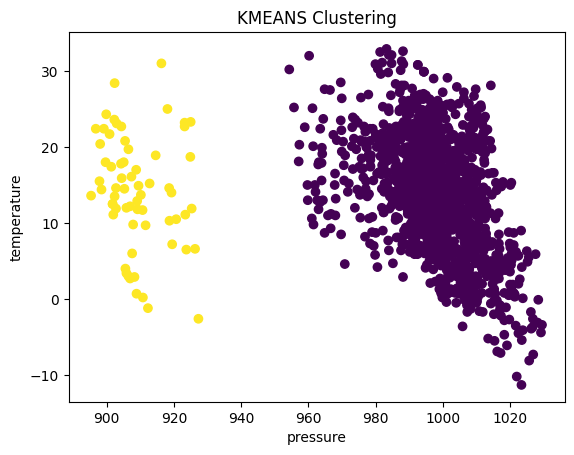

In [238]:
X = df[['pressure', 'temperature']]

kmeans = KMeans(n_clusters=2)

kmeans.fit(X)

df['cluster'] = kmeans.labels_

plt.scatter(df['pressure'], df['temperature'], c=df['cluster'])
plt.xlabel('pressure')
plt.ylabel('temperature')
plt.title('KMEANS Clustering')
plt.show()

df = df.drop('cluster', axis=1)

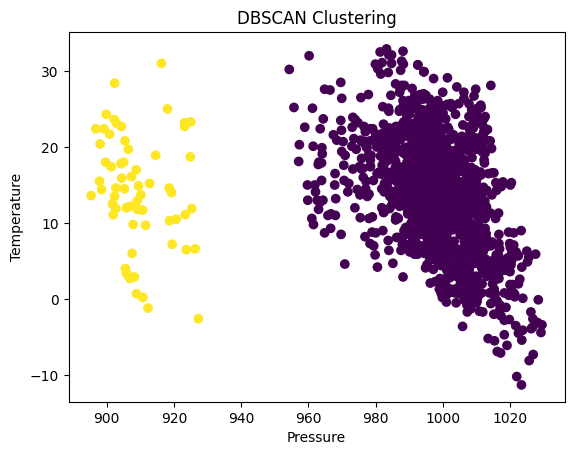

In [232]:
X = df[['pressure', 'temperature']]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.8, min_samples=5)
clusters = dbscan.fit_predict(X_norm)

plt.scatter(X['pressure'], X['temperature'], c=clusters)
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.title('DBSCAN Clustering')
plt.show()

C:\Users\Laptop\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


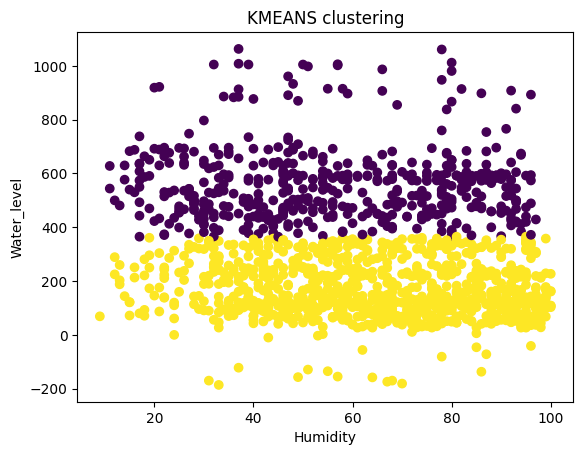

In [231]:
X = df[['humidity', 'water_level']]

kmeans = KMeans(n_clusters=2)

kmeans.fit(X)

df['cluster'] = kmeans.labels_

plt.scatter(df['humidity'], df['water_level'], c=df['cluster'])
plt.xlabel('Humidity')
plt.ylabel('Water_level')
plt.title('KMEANS clustering')
plt.show()

df = df.drop('cluster', axis=1)

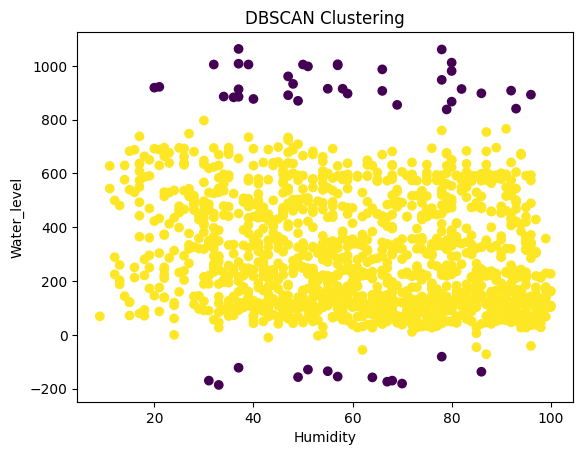

In [233]:
X = df[['humidity', 'water_level']]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.4, min_samples=8)
clusters = dbscan.fit_predict(X_norm)

plt.scatter(X['humidity'], X['water_level'], c=clusters)
plt.xlabel('Humidity')
plt.ylabel('Water_level')
plt.title('DBSCAN Clustering')
plt.show()

C:\Users\Laptop\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


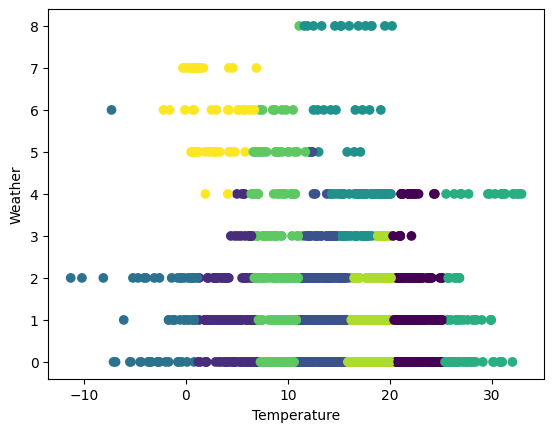

In [234]:
X = df[['temperature', 'weather']]

kmeans = KMeans(n_clusters=9)

kmeans.fit(X)

df['cluster'] = kmeans.labels_

plt.scatter(df['temperature'], df['weather'], c=df['cluster'])
plt.xlabel('Temperature')
plt.ylabel('Weather')
plt.show()

df = df.drop('cluster', axis=1)

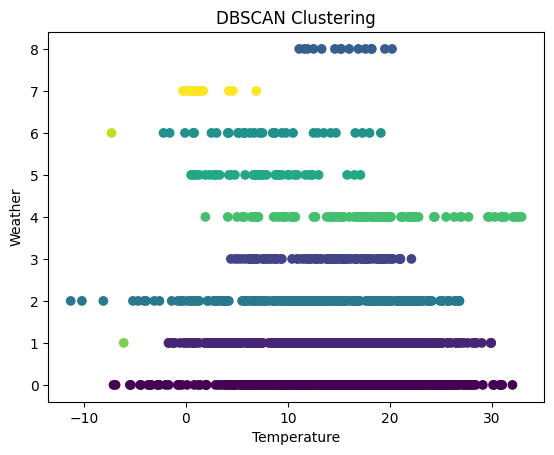

In [235]:
X = df[['temperature', 'weather']]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=1)
clusters = dbscan.fit_predict(X_norm)

plt.scatter(X['temperature'], X['weather'], c=clusters)
plt.xlabel('Temperature')
plt.ylabel('Weather')
plt.title('DBSCAN Clustering')
plt.show()

In [240]:
X = df[['temperature']]
y = df['humidity']

lr = LinearRegression()
lr.fit(X, y)

print(lr.coef_,lr.intercept_)

[-1.68086093] 86.05202881024199


183.18729378632378

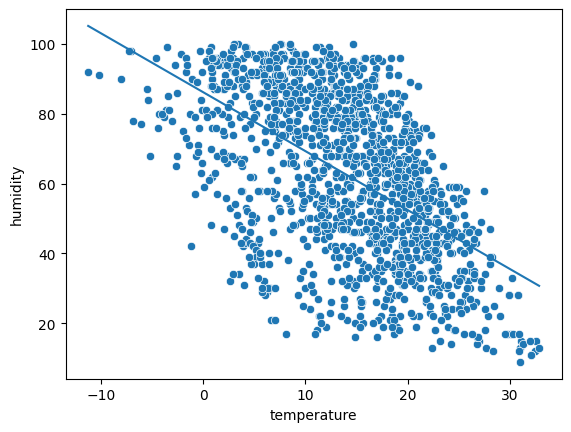

In [91]:
theta0 = lr.intercept_
theta1 = lr.coef_[0]
h = theta0 + theta1 * df['temperature']
sns.scatterplot(x=df['temperature'],y=df['humidity'])
sns.lineplot(x=df['temperature'],y=h)

m = y.shape[0]
error = np.sum((h-y)**2)/(2*m)
error

<Axes: xlabel='temperature', ylabel='humidity'>

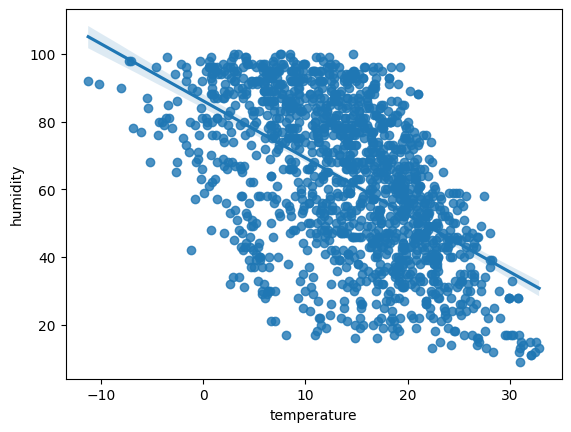

In [86]:
sns.regplot(x=X,y=y)

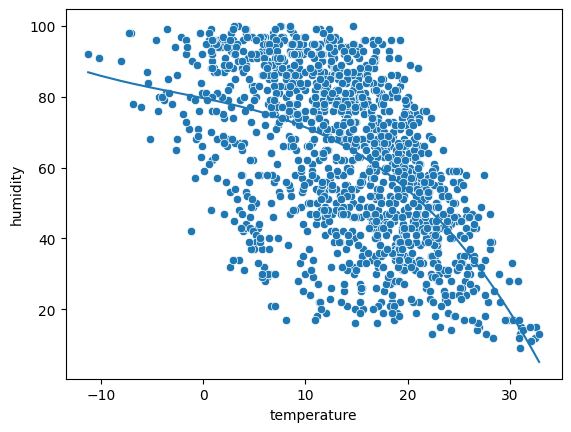

In [105]:
df['temp2'] = df['temperature']**2
df['temp3'] = df['temperature']**3

X = df[['temperature','temp2','temp3']].to_numpy()
y = df['humidity'].to_numpy()

lr2 = LinearRegression()
lr2.fit(X,y)

theta0 = lr2.intercept_
theta1 = lr2.coef_[0]
theta2 = lr2.coef_[1]
theta3 = lr2.coef_[2]
h = theta0 + theta1 * df['temperature'] + theta2 * df['temp2'] + theta3 * df['temp3']
sns.scatterplot(x=df['temperature'],y=df['humidity'])
sns.lineplot(x=df['temperature'],y=h)

m = y.shape[0]
error2 = np.sum((h-y)**2)/(2*m)
error2

df = df.drop('temp2', axis=1)
df = df.drop('temp3', axis=1)

<Axes: xlabel='pressure', ylabel='temperature'>

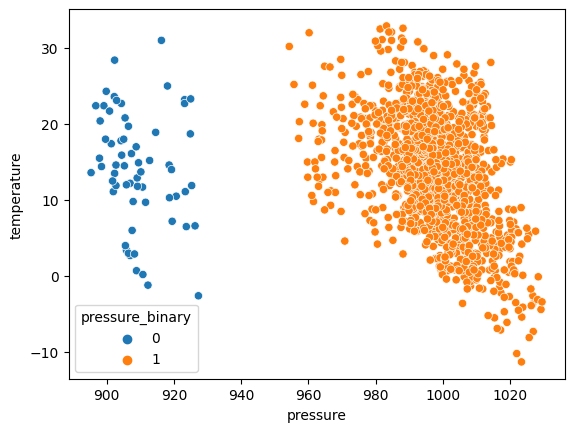

In [262]:
sns.scatterplot(x=df['pressure'],y=df['temperature'],hue=df['pressure_binary'])

In [254]:
df2=df.copy()
df2.head()

,water_level,precipitation,temperature,humidity,visibility,wind,weather,pressure,fire,wl_change,temp_change,pressure_change,pressure_binary
0,468.0,0.0,24.9,31.0,100.0,4.0,0.0,993.8,4.0,-3.0,-0.3,-0.4,1
1,140.0,0.0,27.9,22.0,20.0,1.0,0.0,1004.1,4.0,-2.0,0.6,-1.0,1
2,464.0,0.0,25.6,28.0,20.0,2.0,1.0,1001.2,4.0,-7.0,-1.8,-0.3,1
3,467.0,0.0,26.7,26.0,100.0,3.0,0.0,992.3,4.0,-1.0,1.2,-1.3,1
4,138.0,0.0,29.1,22.0,20.0,1.0,0.0,1001.3,4.0,-2.0,2.5,-1.3,1


In [255]:
df2['weather_str']=df2['weather'].replace(0,'partially_cloudy') \
.replace(1,'cloudy') \
.replace(2,'clear') \
.replace(3,'rain') \
.replace(4,'strong_wind') \
.replace(5,'fog') \
.replace(6,'mist') \
.replace(7,'snow') \
.replace(8,'storm')

df2.drop('weather', axis=1, inplace=True)

df2.head()

,water_level,precipitation,temperature,humidity,visibility,wind,pressure,fire,wl_change,temp_change,pressure_change,pressure_binary,weather_str
0,468.0,0.0,24.9,31.0,100.0,4.0,993.8,4.0,-3.0,-0.3,-0.4,1,partially_cloudy
1,140.0,0.0,27.9,22.0,20.0,1.0,1004.1,4.0,-2.0,0.6,-1.0,1,partially_cloudy
2,464.0,0.0,25.6,28.0,20.0,2.0,1001.2,4.0,-7.0,-1.8,-0.3,1,cloudy
3,467.0,0.0,26.7,26.0,100.0,3.0,992.3,4.0,-1.0,1.2,-1.3,1,partially_cloudy
4,138.0,0.0,29.1,22.0,20.0,1.0,1001.3,4.0,-2.0,2.5,-1.3,1,partially_cloudy


In [256]:
weather_encoded = pd.get_dummies(df2['weather_str'], prefix='w',dtype=float)

df2 = pd.concat([df2, weather_encoded], axis=1)

df2.drop('weather_str', axis=1, inplace=True)

df2.head()

,water_level,precipitation,temperature,humidity,visibility,wind,pressure,fire,wl_change,temp_change,...,pressure_binary,w_clear,w_cloudy,w_fog,w_mist,w_partially_cloudy,w_rain,w_snow,w_storm,w_strong_wind
0,468.0,0.0,24.9,31.0,100.0,4.0,993.8,4.0,-3.0,-0.3,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,140.0,0.0,27.9,22.0,20.0,1.0,1004.1,4.0,-2.0,0.6,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,464.0,0.0,25.6,28.0,20.0,2.0,1001.2,4.0,-7.0,-1.8,...,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,467.0,0.0,26.7,26.0,100.0,3.0,992.3,4.0,-1.0,1.2,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,138.0,0.0,29.1,22.0,20.0,1.0,1001.3,4.0,-2.0,2.5,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
